In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.strategy.indicators.notebook_utils import fetchIndicators, genDataForAll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:


def filter_optimal(optimal):
    if optimal > 0.75:
        return 1.0
    # elif optimal < -0.99:
    #     return -1.0
    else:
        return 0.0


model = Trading(load_config('config.hjson'))

dataset_list = []
for g,n in model.df_groups:
    print(n)
    for d in g:
        
        cur_dataset = d
        my_inds = fetchIndicators(["rsi", "macd", "stochastic_oscillator", "optimal_v2"], param_specification={
            'macd.signal': 360,
            'macd.ema_slow': 480,
            'macd.ema_fast': 240,
            'ema.period': 360,
            'sma.period': 360,
            'stochastic_oscillator.highlow': 360,
            'stochastic_oscillator.k': 1080,
            'rsi.period': 360,
            'bollinger_bands.period': 360
        })
        genDataForAll(cur_dataset, my_inds)
        cur_dataset.dropna(inplace=True)

        roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='RSI_5')
        roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='RSI_1')
        roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='RSI_10')
        roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='RSI_60')
        roc_1.genData(cur_dataset, gen_new_values=False, value='RSI')
        roc_5.genData(cur_dataset, gen_new_values=False, value='RSI')
        roc_10.genData(cur_dataset, gen_new_values=False, value='RSI')
        roc_60.genData(cur_dataset, gen_new_values=False, value='RSI')
        roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='MACD_5')
        roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='MACD_1')
        roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='MACD_10')
        roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='MACD_60')
        roc_1.genData(cur_dataset, gen_new_values=False, value='MACD')
        roc_5.genData(cur_dataset, gen_new_values=False, value='MACD')
        roc_10.genData(cur_dataset, gen_new_values=False, value='MACD')
        roc_60.genData(cur_dataset, gen_new_values=False, value='MACD')
        roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='close_5')
        roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='close_1')
        roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='close_10')
        roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='close_60')
        roc_1.genData(cur_dataset, gen_new_values=False, value='close')
        roc_5.genData(cur_dataset, gen_new_values=False, value='close')
        roc_10.genData(cur_dataset, gen_new_values=False, value='close')
        roc_60.genData(cur_dataset, gen_new_values=False, value='close')
        roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='stosc_k_5')
        roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='stosc_k_1')
        roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='stosc_k_10')
        roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='stosc_k_60')
        roc_1.genData(cur_dataset, gen_new_values=False, value='stosc_k')
        roc_5.genData(cur_dataset, gen_new_values=False, value='stosc_k')
        roc_10.genData(cur_dataset, gen_new_values=False, value='stosc_k')
        roc_60.genData(cur_dataset, gen_new_values=False, value='stosc_k')
        roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='stosc_d_5')
        roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='stosc_d_1')
        roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='stosc_d_10')
        roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='stosc_d_60')
        roc_1.genData(cur_dataset, gen_new_values=False, value='stosc_d')
        roc_5.genData(cur_dataset, gen_new_values=False, value='stosc_d')
        roc_10.genData(cur_dataset, gen_new_values=False, value='stosc_d')
        roc_60.genData(cur_dataset, gen_new_values=False, value='stosc_d')
        cur_dataset['optimal'] = cur_dataset.apply(lambda x: filter_optimal(x.optimal), axis=1)
        dataset_list.append(cur_dataset)

        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




ADAUSDT-1m
ATOMUSDT-1m
BATUSDT-1m
BCHUSDT-1m
BTCUSDT-1m
BNBUSDT-1m
COMPUSDT-1m
EGLDUSDT-1m
ETCUSDT-1m
ETHUSDT-1m
LTCUSDT-1m
UNIUSDT-1m
VETUSDT-1m
XLMUSDT-1m
XRPUSDT-1m


In [3]:
final_dataset = pd.concat(dataset_list)

In [4]:
mm_scalar = MinMaxScaler()

final_dataset.dropna(inplace=True)
final_dataset[["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]] = mm_scalar.fit_transform(final_dataset[["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]])

In [ ]:
final_dataset

In [ ]:
import joblib

joblib.dump(mm_scalar, './mm_scalar.sav')

In [5]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [6]:

buy_signals = train[train['optimal'] == 1.0]

In [7]:
mean_num_singals = int(len(buy_signals))

In [8]:
not_signals = train[train['optimal'] == 0.0]


In [9]:
print(mean_num_singals, len(not_signals))

141378 3595386


In [10]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [11]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])

In [12]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]]




balanced_data_optimal_buy = balanced_data_buy[['optimal']]



In [13]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, random_state=69420)

In [14]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [15]:
import pickle

In [1]:
filtered_test = test[["close", 'optimal']]
filtered_test_2 = test[["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60""]]

SyntaxError: EOL while scanning string literal (<ipython-input-1-6d7aed3eb74e>, line 2)

In [17]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [18]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [19]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [20]:
len(filtered_test)

196672

In [21]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

1873

In [22]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.optimal), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [23]:
reset_filtered = filtered_test.reset_index(drop=True)

In [24]:
# reset_filtered

In [25]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [26]:
# reset_filtered

In [35]:
first_amnt = reset_filtered[5000:10000]

<Figure size 432x288 with 0 Axes>

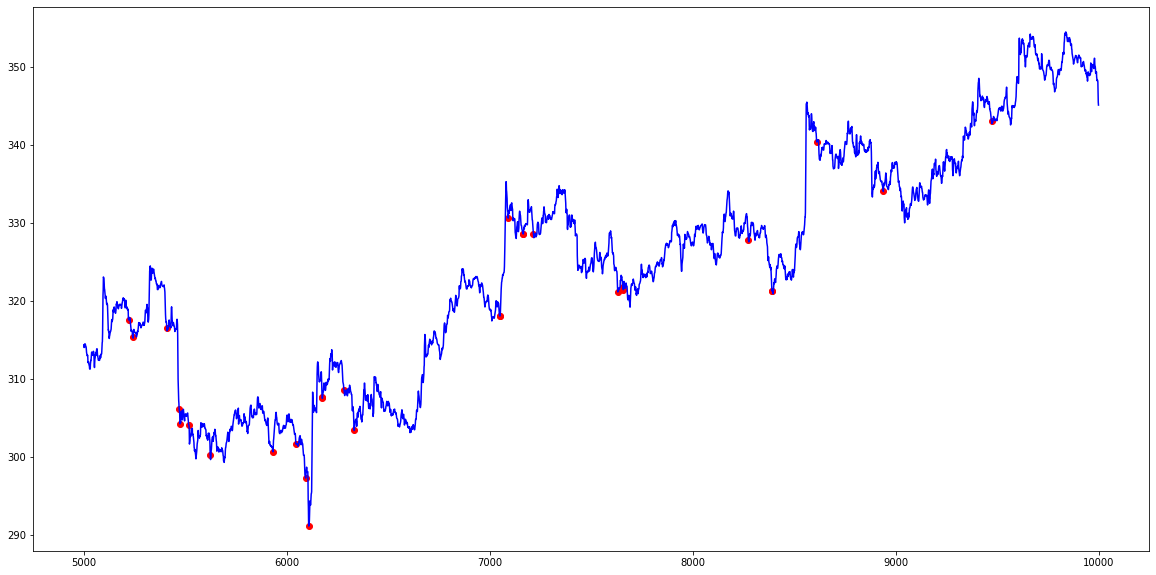

In [36]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')
# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [37]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()

In [38]:
with open('./trough_model_v3.pickle', 'wb') as handle:
    pickle.dump(clf_buy, handle, protocol=pickle.HIGHEST_PROTOCOL)